<h1 style="color:rgb(0,120,170)">Hands-on AI I</h1>
<h2 style="color:rgb(0,120,170)">Unit 1 &ndash; Tabular Data and Dimensionality Reduction</h2>

<b>Authors:</b> J. Brandstetter, B. Schäfl, A. Schörgenhumer, R. Dangl<br>
<b>Date:</b> 01-10-2024

This file is part of the "Hands-on AI I" lecture material. The following copyright statement applies to all code within this file.

<b>Copyright statement:</b><br>
This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h3 style="color:rgb(0,120,170)">How to use this notebook</h3>

This notebook is designed to run from start to finish. There are different tasks (displayed in <span style="color:rgb(248,138,36)">orange boxes</span>) which might require small code modifications. Most/All of the used functions are imported from the file <code>u1_utils.py</code> which can be seen and treated as a black box. However, for further understanding, you can look at the implementations of the helper functions. In order to run this notebook, the packages which are imported at the beginning of <code>u1_utils.py</code> need to be installed.

In [1]:
# Import pre-defined utilities specific to this notebook.
import u1_utils as u1

# Import additional utilities needed in this notebook.
import numpy as np
import seaborn as sns

# Set default plotting style.
sns.set_theme()

# Setup Jupyter notebook (warning: this may affect all Jupyter notebooks running on the same Jupyter server).
u1.setup_jupyter()

<h3 style="color:rgb(0,120,170)">Module versions</h3>

As mentioned in the introductory slides, specific minimum versions of Python itself as well as of used modules are recommended.

In [2]:
u1.check_module_versions()

Installed Python version: 3.12 (✓)
Installed numpy version: 1.26.4 (✓)
Installed pandas version: 2.2.2 (✓)
Installed scikit-learn version: 1.4.2 (✓)
Installed matplotlib version: 3.8.4 (✓)
Installed seaborn version: 0.13.2 (✓)


<h2> Tabular data</h2>

We will start with a data set composed of various measurements of different <i>wine</i> attributes (e.g. the <i>alcohol concentration</i>). The data set distinguishes <i>three</i> different classes, one for each cultivator. It was published/donored by <i>S. Aeberhard</i> and originally gathered by:

<cite>Forina, M. et al, PARVUS - An Extendible Package for Data Exploration, Classification and Correlation. Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno, 16147 Genoa, Italy.</cite>

Currently, it is maintained by the UCI Machine Learning Repository:

<cite>Lichman, M. (2013). [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). Irvine, CA: University of California, School of Information and Computer Science.</cite>

In [3]:
wine_data = u1.load_wine()

Below you can see a table with all 178 samples (we start to count at 0). Tabular data can have columns in various data types. In our case the thirteen features are given in floating point numbers (recall <i>primitive data types</i>). We would refer to the cultivator as a <i>label</i> or <i>target</i> rather than a feature, because we want to predict the cultivator using all other features.

Summarizing, the popular wine data set contains results of a chemical analysis for $n=178$ different wines from three different classes, namely:

- Cultivator 0 ($n_{c0}=59$)
- Cultivator 1 ($n_{c1}=71$)
- Cultivator 2 ($n_{c2}=48$).

Moreover, we have the following $d=13$ features:

- alcohol
- malic acid
- ash
- alcalinity of ash  
- magnesium
- total phenols
- flavanoids
- nonflavanoid phenols
- proanthocyanins
- color intensity
- hue
- OD280/OD315 of diluted wines
- proline  

In [4]:
wine_data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cultivator
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


We can get a summary of the dataframe with <code>info()</code>:

In [5]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  culti

We can also check out any variable in more detail:

In [6]:
wine_data.cultivator

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: cultivator, Length: 178, dtype: int64

In [7]:
wine_data.cultivator.value_counts()

cultivator
1    71
0    59
2    48
Name: count, dtype: int64

Just looking at the data table itself doesn't tell us that much about the data however. We have to analyze it in order to get a better insight into the configuration of the features and the data set as a whole. First, it is adviseable to look at a few statistics such as the mean, standard deviation and the quantiles (where the 50% quantile, or second quartile, is the median) by using <code>describe()</code>:

In [8]:
# we drop the column 'cultivator' from the data because it does not make sense to compute the mean, median, etc. of this column
wine_data.drop(columns=['cultivator'], inplace=False).describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<h3 style="color:rgb(0,120,170)">Boxplot</h3>

Just by looking at the pure numbers of the locations measures we also don't necessarily immediately spot interesting characteristics. We can plot them though using a boxplot:

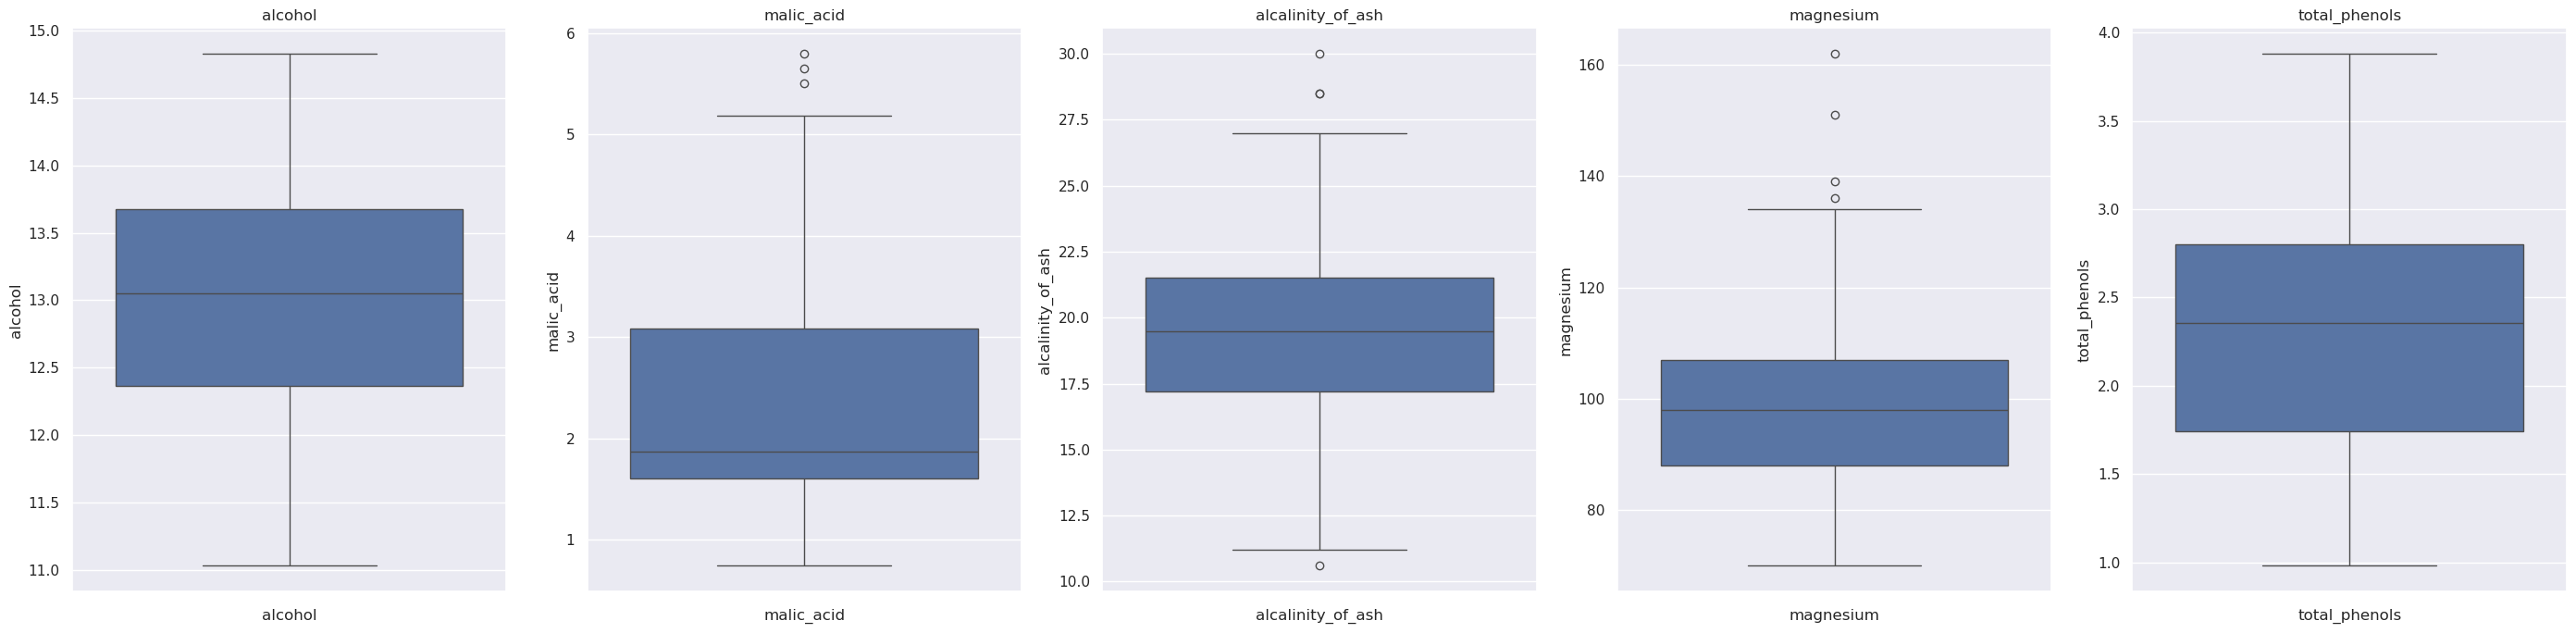

In [9]:
u1.boxplots(data=wine_data, features=["alcohol", "malic_acid", "alcalinity_of_ash", "magnesium", "total_phenols"])

In addition, it might in fact be even more interesting (given that we know which wines come from which cultivator) to split each feature into the three cultivator groups and plot these boxplots:

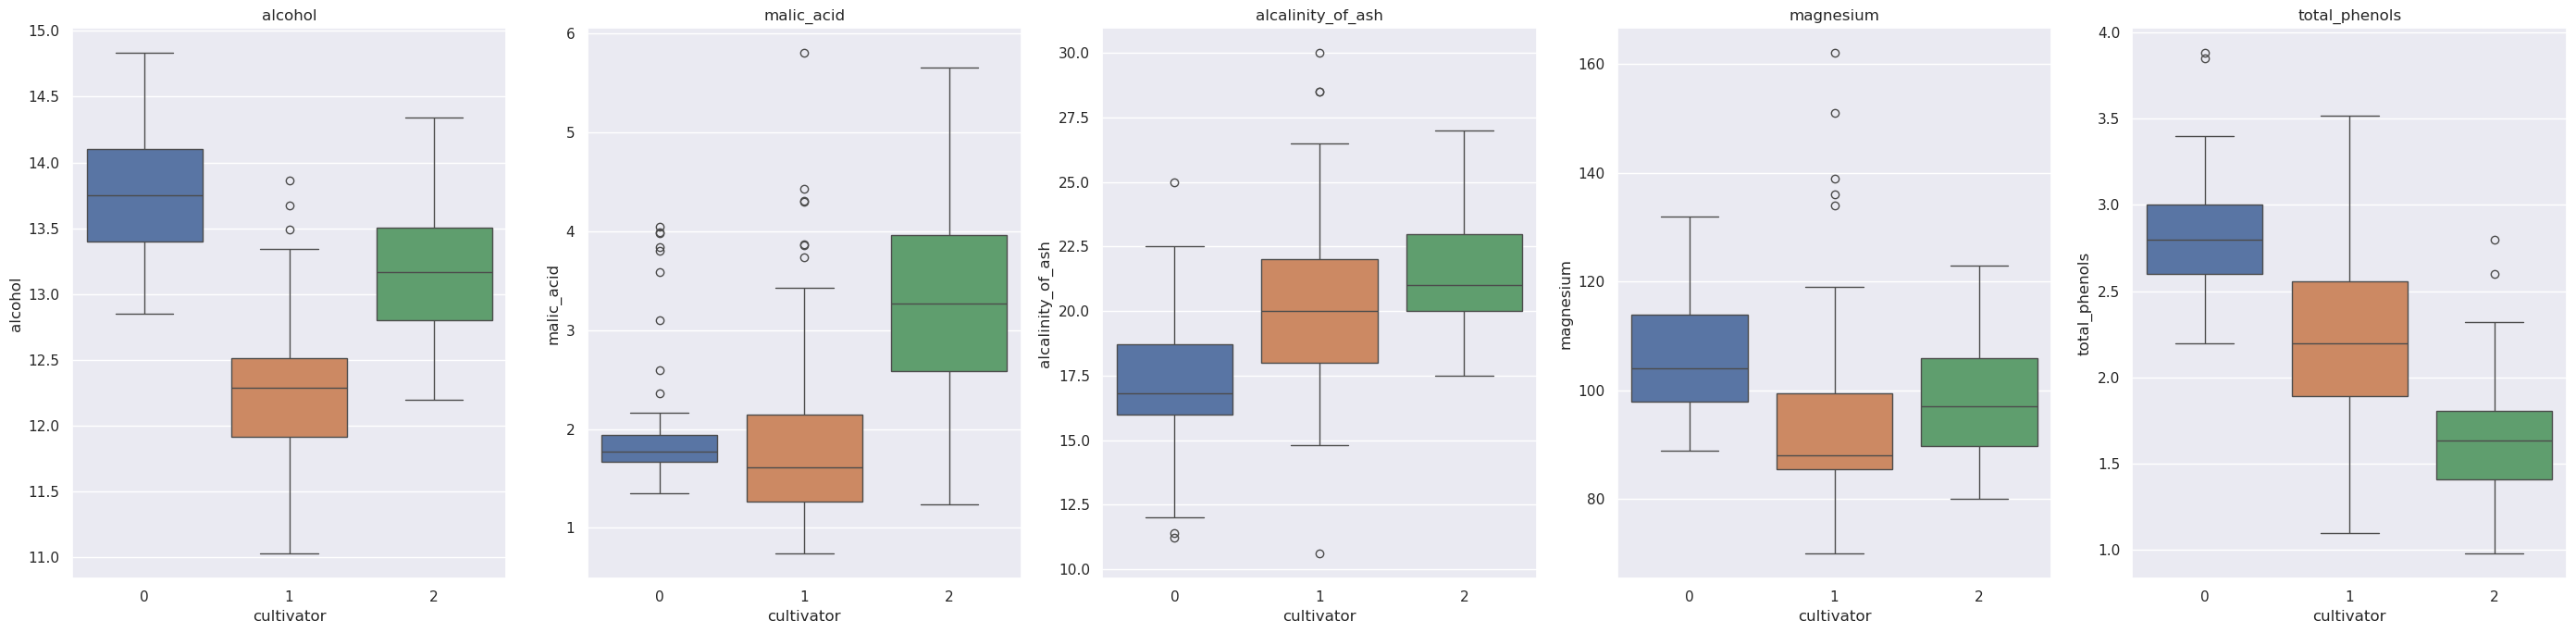

In [10]:
u1.boxplots(data=wine_data, features=["alcohol", "malic_acid", "alcalinity_of_ash", "magnesium", "total_phenols"], target_column="cultivator")

For example, here we can see that for the feature 'alcohol', the median value of alcohol content in the wines of cultivator 1 (horizontal line in the box) is about 12.35%. The first and third quartile (25 and 50 percent quantile) of the values are at about 11.9% and 12.5% respectively. Therefore, the box represents half of the values. The lines extending to either side of the box (whiskers) give us an indication how the other half of the data outside of the box are distributed. Their length is determined by the maximum and miminum value in the data or $IQR \times 1.5$, where $IQR$ is the interquartile range (75% minus 25% quantile), whatever is closer to the median. Any data points outside of the whisker boundaries are potential outliers and it may be advisable to have a look at those observations - they might be totally valid data points but they might as well be the result of some measurement error that could distort the subsequent computations.

<h3 style="color:rgb(0,120,170)">Histogram and Density estimation</h3>

Another option to visualize the value distribution is by means of a histogram. 

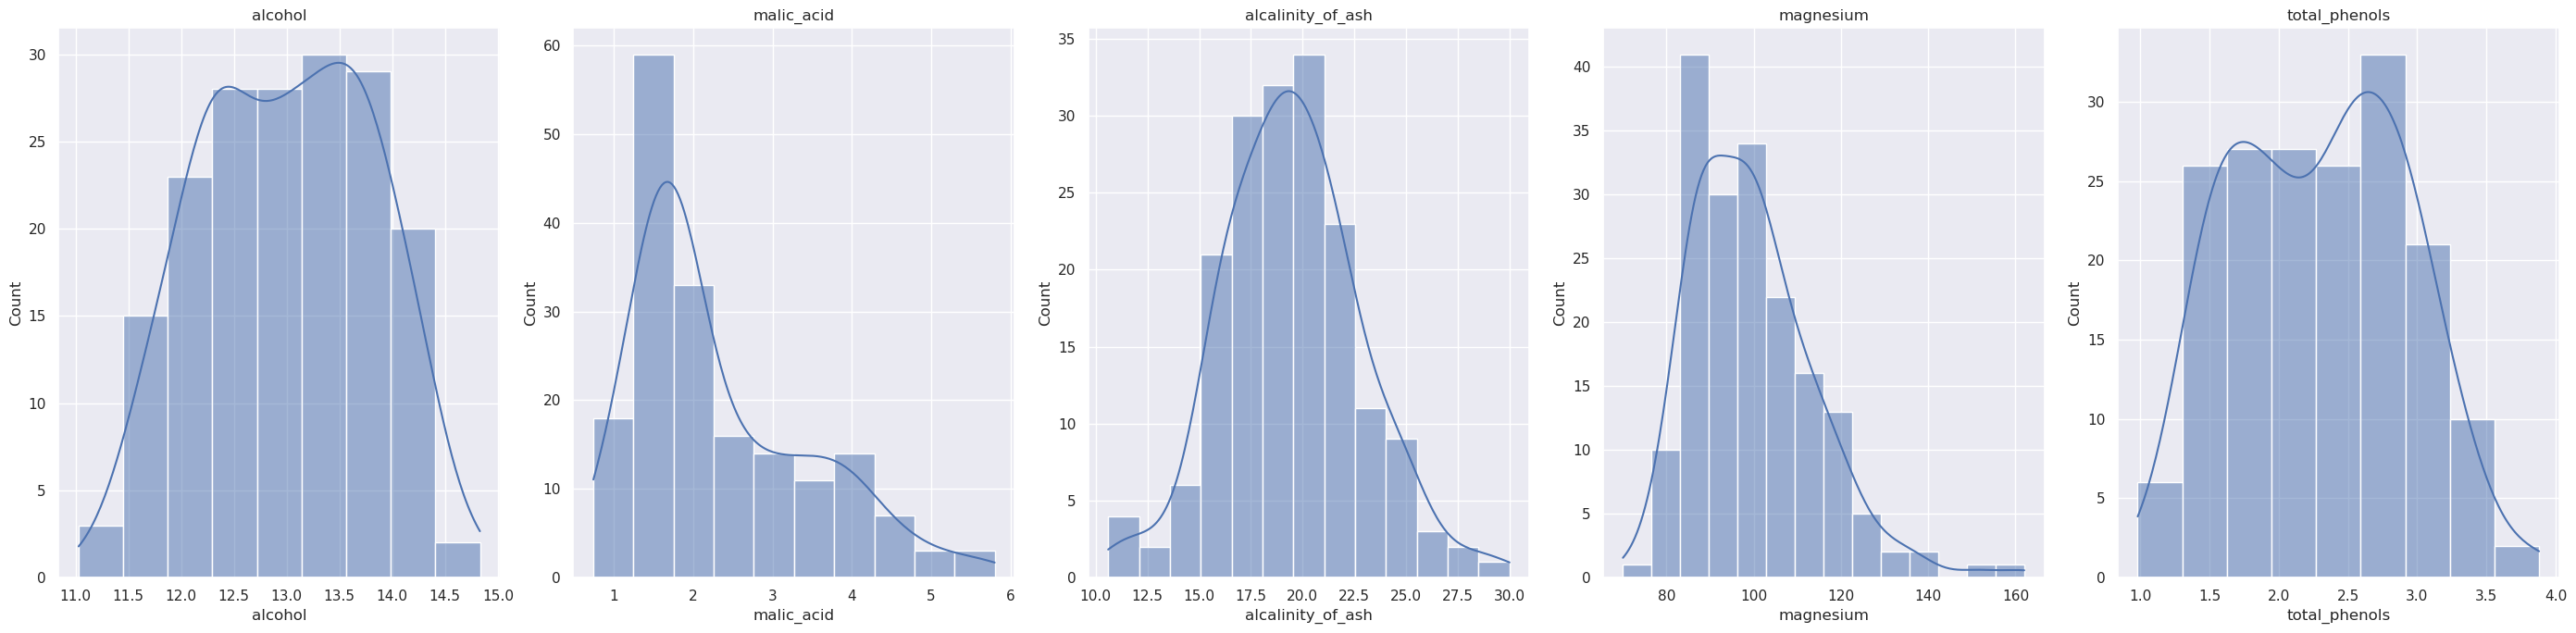

In [11]:
u1.histograms(data=wine_data, features=["alcohol", "malic_acid", "alcalinity_of_ash", "magnesium", "total_phenols"])

We can also split the histograms according to our target feature:

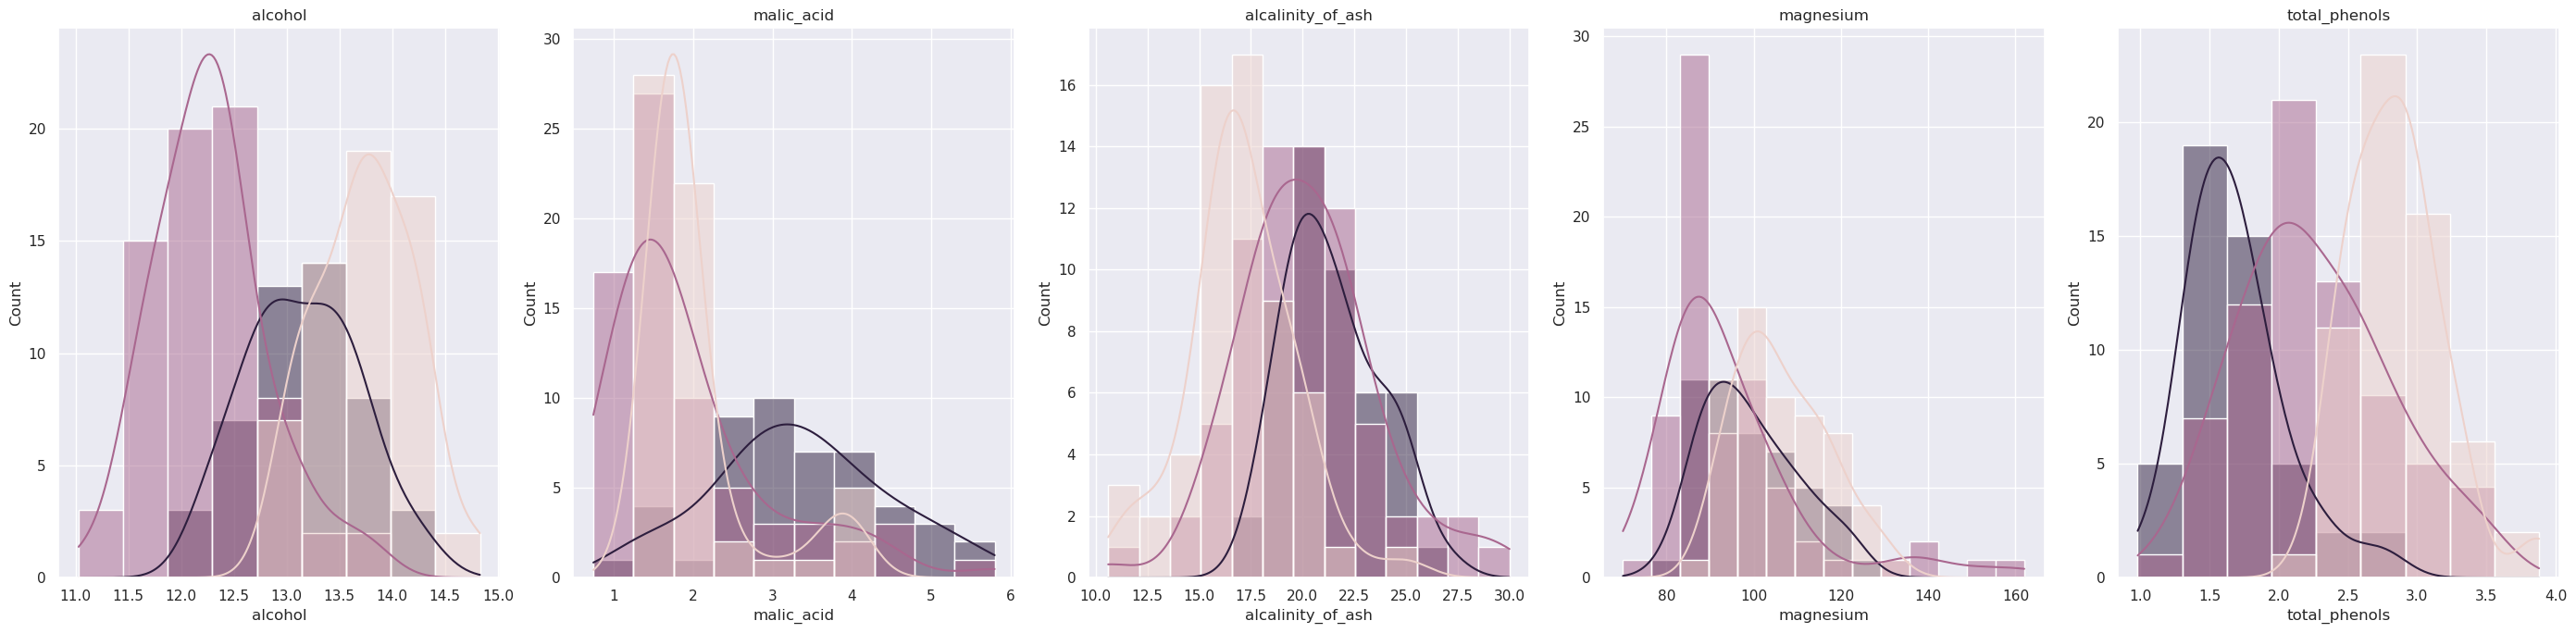

In [12]:
u1.histograms(data=wine_data, features=["alcohol", "malic_acid", "alcalinity_of_ash", "magnesium", "total_phenols"], target_column="cultivator")

In addition to the histogram, we also get a kernel density estimation - which means that we get an empirical estimate of the probability distribution function that the data is drawn from.

<h3 style="color:rgb(0,120,170)">Feature correlation plot</h3>

In machine learning, we consider a feature vector $\boldsymbol{x}$ as input to the machine learning algorithm, and therefore as <i>input feature vector</i>. Apart from just looking at the features in an isolated way as above, it is thus quite important to get an impression of how the features interact. How do they correlate? Which ones have a good separation power?

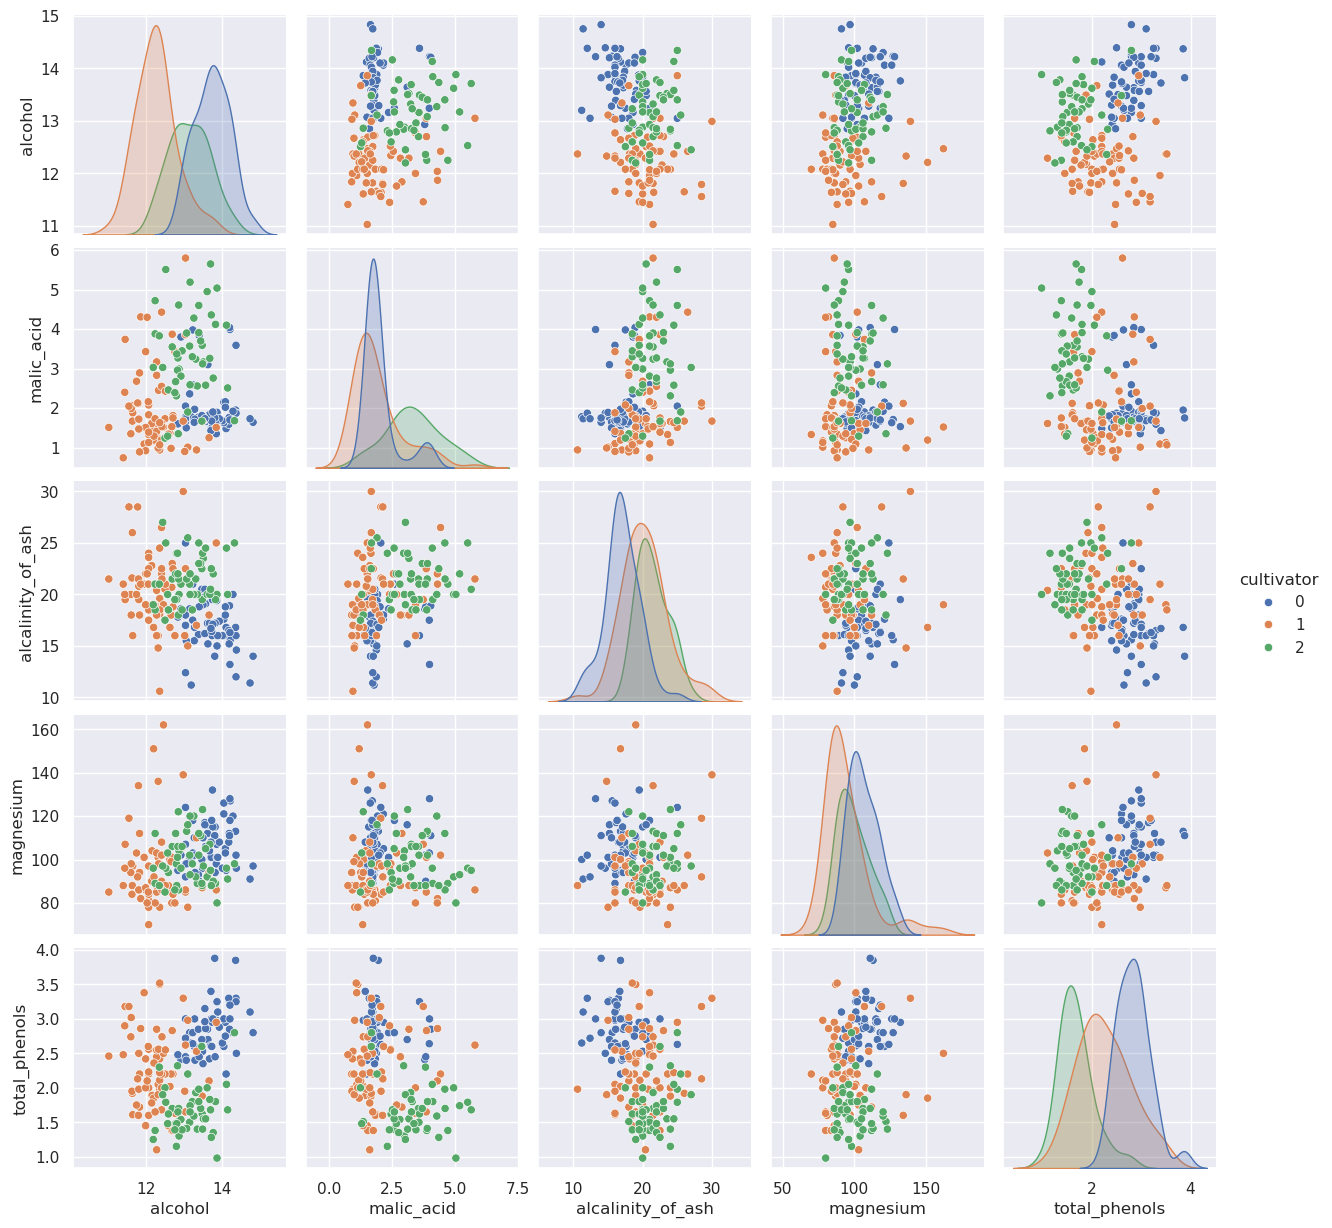

In [13]:
u1.plot_features(data=wine_data, features=["alcohol", "malic_acid", "alcalinity_of_ash", "magnesium", "total_phenols"], target_column="cultivator")

We can now also take a closer look at a specific combination of features. We can get a good scatterplot when we select features where the three groups are clearly separated in the kernel density estimates, or when we use features where one group overlaps with different group in the two features. Here we can take a look at alcohol and total_phenols:

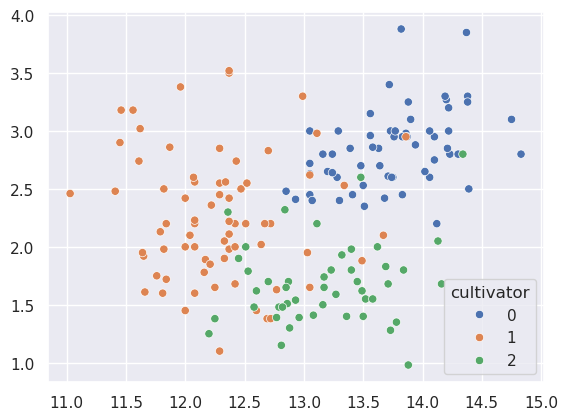

In [14]:
u1.scatterplot(data=wine_data, plotting_features=["alcohol", "total_phenols"], target_column="cultivator")

Still, keep in mind that this plot is only one possible visualization - our dataset has a many more features and we lose a lot of information in this scatterplot because we only use 2 of them.

<h3 style="color:rgb(0,120,170)">Dimensionality reduction</h3>

As seen above, samples from the same cultivator form a so called <i>cluster</i>, as they are closer to each other in feature space than samples from different cultivators. 
A way of visualizing clusters would be a plot where every sample is displayed as a dot, just as we did above. However, since we have thirteen features, we would need a thirteen dimensional space (one coordinate for every feature) to represent every sample as a dot. This makes it impossible to plot the samples directly (just using two features as we just did does not really capture enough information about our data).<br>

Often, data is described with hundreds or thousands of features and therefore the visualization of those features is a very common problem. To overcome this problem, several <i>dimensionality reduction</i> techniques exist. We will apply one of the basic techniques to our data: the <i>Principal Component Ananlysis</i> or <i>PCA</i> in short. In the course of your study, you will learn more about this method. For now, it is not important what exactly is going on behind the scenes. All you need to know is that we need the number of dimensions to which we want to reduce the data. In our case, we choose the dimension $d=2$, so we can represent every sample as a dot in 2 dimensions.

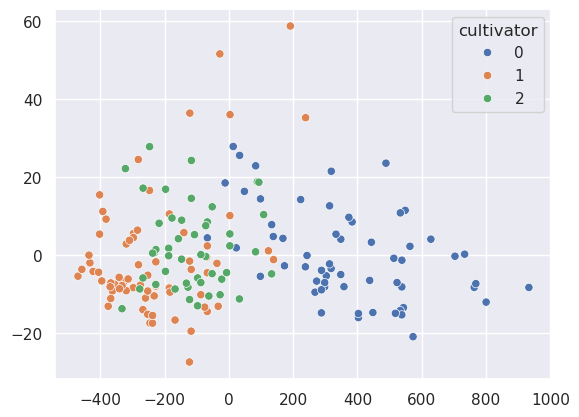

In [17]:
# this PCA implementation incorporates randomness, so we set the seed for the global random number generator to get reproducible results
np.random.seed(seed=42)
wine_data_pca = u1.apply_pca(n_components=2, data=wine_data, target_column="cultivator")
u1.scatterplot(data=wine_data_pca, target_column="cultivator")

We can try a different down projection method. The next one we will use is called <i>t-SNE</i>. Again, for now, it is not important how the method exactly works. The key takeaway point is that such a down projection is not unique, i.e., different methods will yield different results. Even the same method will yield different results sometimes.

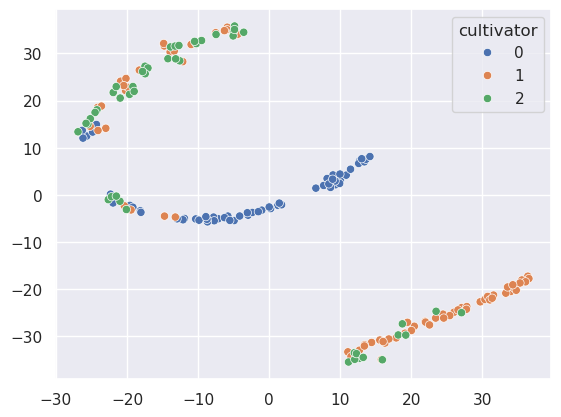

In [18]:
# this t-SNE implementation incorporates randomness, so we set the seed for the global random number generator to get reproducible results
np.random.seed(seed=42)
wine_data_tsne = u1.apply_tsne(n_components=2, data=wine_data, perplexity=10.0, target_column="cultivator")
u1.scatterplot(data=wine_data_tsne, target_column="cultivator")